In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import matplotlib.mlab as mlab
import matplotlib
from scipy.ndimage.filters import gaussian_filter

In [2]:
def bivariate_normal(X, Y, sigmax=1.0, sigmay=1.0,
                 mux=0.0, muy=0.0, sigmaxy=0.0):
    """
    Bivariate Gaussian distribution for equal shape *X*, *Y*.
    See `bivariate normal
    <http://mathworld.wolfram.com/BivariateNormalDistribution.html>`_
    at mathworld.
    """
    Xmu = X-mux
    Ymu = Y-muy

    rho = sigmaxy/(sigmax*sigmay)
    z = Xmu**2/sigmax**2 + Ymu**2/sigmay**2 - 2*rho*Xmu*Ymu/(sigmax*sigmay)
    denom = 2*np.pi*sigmax*sigmay*np.sqrt(1-rho**2)
    return np.exp(-z/(2*(1-rho**2))) / denom

In [6]:
file = 'RGR1-D07-002'
data = pd.read_csv('{}.csv'.format(file))
data

,Depth,bkgrnd-line1,line1,bkgrnd-mlineo,mline0,Unnamed: 5,Unnamed: 6,line1result,Line0-result
0,0,6.450000e-08,1.120000e-07,-3.500000e-07,2.700000e-07,NaN,NaN,4.750000e-08,6.200000e-07
1,1,8.400000e-08,1.310000e-07,-3.370000e-07,2.900000e-07,NaN,NaN,4.700000e-08,6.270000e-07
2,2,1.160000e-07,1.590000e-07,-3.160000e-07,3.170000e-07,NaN,NaN,4.300000e-08,6.330000e-07
3,3,1.600000e-07,1.980000e-07,-2.860000e-07,3.470000e-07,NaN,NaN,3.800000e-08,6.330000e-07
4,4,2.110000e-07,2.420000e-07,-2.490000e-07,3.800000e-07,NaN,NaN,3.100000e-08,6.290000e-07
...,...,...,...,...,...,...,...,...,...
196,196,5.930000e-08,1.300000e-07,-2.910000e-07,4.410000e-07,NaN,NaN,7.070000e-08,7.320000e-07
197,197,5.910000e-08,1.260000e-07,-2.970000e-07,4.200000e-07,NaN,NaN,6.690000e-08,7.170000e-07
198,198,5.920000e-08,1.230000e-07,-3.030000e-07,3.990000e-07,NaN,NaN,6.380000e-08,7.020000e-07
199,199,5.940000e-08,1.210000e-07,-3.100000e-07,3.770000e-07,NaN,NaN,6.160000e-08,6.870000e-07


In [7]:
depth = data['Depth']/5
line0 = data['Line0-result'] - np.mean(data['Line0-result'])
line1 = data['line1result'] - np.mean(data['line1result'])

In [8]:
frame = {'Depth': depth, 'Line_1': line0, 'Line_2': line1}
df = pd.DataFrame(frame)
df.to_csv('{}_normalized.csv'.format(file),index=False)
df

,Depth,Line_1,Line_2
0,0.0,1.391841e-07,6.301741e-08
1,0.2,1.461841e-07,6.251741e-08
2,0.4,1.521841e-07,5.851741e-08
3,0.6,1.521841e-07,5.351741e-08
4,0.8,1.481841e-07,4.651741e-08
...,...,...,...
196,39.2,2.511841e-07,8.621741e-08
197,39.4,2.361841e-07,8.241741e-08
198,39.6,2.211841e-07,7.931741e-08
199,39.8,2.061841e-07,7.711741e-08


In [9]:
np.max(depth)

40.0

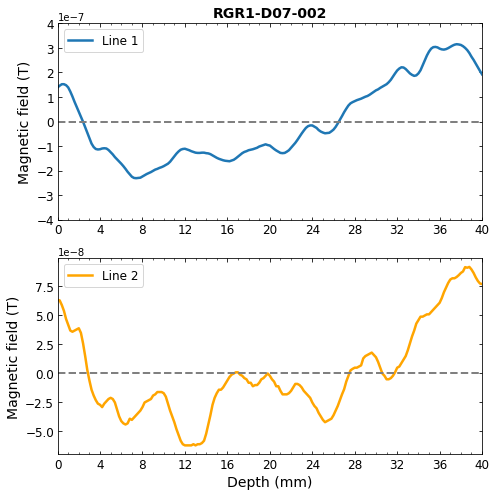

In [10]:
fig = plt.figure(figsize=(7,7))

ax1 = fig.add_subplot(211)
ax1.plot(depth, line0,zorder=2, linewidth=2.5, label='Line 1')
ax1.set_ylim(-4.0*1e-7, 4.0*1e-7)
ax1.set_xlim(0, np.max(depth))
plt.title('{}'.format(file), fontsize=14, fontweight='bold')

ax2 = fig.add_subplot(212)
ax2.plot(depth, line1, zorder=2, linewidth=2.5, label='Line 2', color='orange')
#ax2.set_ylim(-2*1e-6, 1*1e-6)
ax2.set_xlim(0, np.max(depth))
#plt.title('Line 2 {}'.format(file), fontsize=14, fontweight='bold')


major_xticks = np.arange(0, np.max(depth)+4, 4)
minor_xticks = np.arange(0, np.max(depth), 1)

major_yticks = np.arange(-3*1e-7, 3*1e-7, 1*1e-7)
minor_yticks = np.arange(-3*1e-7, 3*1e-7, 0.25*1e-7)


ax1.set_xticks(major_xticks)
ax1.set_xticks(minor_xticks, minor = True)

#ax2.set_yticks(major_yticks)
#ax2.set_yticks(minor_yticks, minor = True)

#ax2.grid(which = 'minor', alpha = 0.3)
#ax2.grid(which = 'major', alpha = 0.7)

ax1.tick_params(which = 'both', direction = 'in')

#ax1.set_xlabel('Depth (m)', size=14)
ax1.set_ylabel('Magnetic field (T)', size=14)

ax1.yaxis.set_ticks_position('both')
ax1.xaxis.set_ticks_position('both')


ax1.tick_params(axis="x", labelsize=12)
ax1.tick_params(axis="y", labelsize=12)

ax1.legend(fontsize=12)


ax2.set_xticks(major_xticks)
ax2.set_xticks(minor_xticks, minor = True)

#ax2.set_yticks(major_yticks)
#ax2.set_yticks(minor_yticks, minor = True)

#ax2.grid(which = 'minor', alpha = 0.3)
#ax2.grid(which = 'major', alpha = 0.7)

ax2.tick_params(which = 'both', direction = 'in')

ax2.set_xlabel('Depth (mm)', size=14)
ax2.set_ylabel('Magnetic field (T)', size=14)

ax2.yaxis.set_ticks_position('both')
ax2.xaxis.set_ticks_position('both')


ax2.tick_params(axis="x", labelsize=12)
ax2.tick_params(axis="y", labelsize=12)

ax2.legend(fontsize=12)


#ax.set_yticks(major_xticks)
#ax.set_yticks(minor_yticks, minor = True)

ax1.axhline(0, color='gray', linewidth=2.0, ls='--')
ax2.axhline(0, color='gray', linewidth=2.0, ls='--')
plt.tight_layout()
plt.savefig('teste.pdf', dpi=120)
plt.savefig('teste2.png', dpi=120)
plt.show()

In [13]:
file = 'RGR1-D07-002'
data = pd.read_csv('{}.csv'.format(file))
#dummy_df = pd.read_csv('dummy_df.csv')
#dummy_df2 = pd.read_csv('dummy_df.csv')
#del dummy_df['Unnamed: 0']
#del dummy_df2['Unnamed: 0']
#data

height = len(data)
width = 100
dummy_df = pd.DataFrame(0, index=range(height), columns=range(width))
dummy_df2 = pd.DataFrame(0, index=range(height), columns=range(width))
#dummy_df

data

,Depth,bkgrnd-line1,line1,bkgrnd-mlineo,mline0,Unnamed: 5,Unnamed: 6,line1result,Line0-result
0,0,6.450000e-08,1.120000e-07,-3.500000e-07,2.700000e-07,NaN,NaN,4.750000e-08,6.200000e-07
1,1,8.400000e-08,1.310000e-07,-3.370000e-07,2.900000e-07,NaN,NaN,4.700000e-08,6.270000e-07
2,2,1.160000e-07,1.590000e-07,-3.160000e-07,3.170000e-07,NaN,NaN,4.300000e-08,6.330000e-07
3,3,1.600000e-07,1.980000e-07,-2.860000e-07,3.470000e-07,NaN,NaN,3.800000e-08,6.330000e-07
4,4,2.110000e-07,2.420000e-07,-2.490000e-07,3.800000e-07,NaN,NaN,3.100000e-08,6.290000e-07
...,...,...,...,...,...,...,...,...,...
196,196,5.930000e-08,1.300000e-07,-2.910000e-07,4.410000e-07,NaN,NaN,7.070000e-08,7.320000e-07
197,197,5.910000e-08,1.260000e-07,-2.970000e-07,4.200000e-07,NaN,NaN,6.690000e-08,7.170000e-07
198,198,5.920000e-08,1.230000e-07,-3.030000e-07,3.990000e-07,NaN,NaN,6.380000e-08,7.020000e-07
199,199,5.940000e-08,1.210000e-07,-3.100000e-07,3.770000e-07,NaN,NaN,6.160000e-08,6.870000e-07


In [14]:
depth = data['Depth']/5
line0 = data['Line0-result'] - np.mean(data['Line0-result'])
line1 = data['line1result'] - np.mean(data['line1result'])

In [15]:
line0_array = dummy_df
line1_array = dummy_df2
for i in range(0,100):
    line0_array[i] = line0
    line1_array[i] = line1

In [16]:
line0_array = line0_array.to_numpy()
line1_array = line1_array.to_numpy()

In [17]:
x, y = np.linspace(0,np.max(depth),len(depth)), np.arange(0,100,1)

In [93]:
print(np.nanmin(line0_array.T),np.nanmax(line0_array.T))

-1.7232298136645964e-06 5.967701863354039e-07


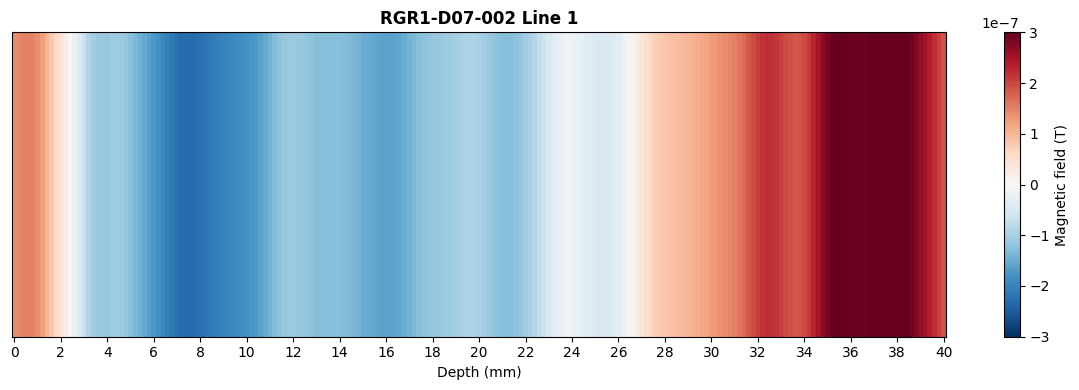

In [18]:
import matplotlib
matplotlib.rcParams.update(matplotlib.rcParamsDefault)
plt.rcParams['ytick.left'] = False
plt.rcParams['ytick.labelleft'] = False
fig = plt.figure(figsize=(12,4))
plt.pcolormesh(x,y,line0_array.T, cmap='RdBu_r', vmin=-3e-7,vmax=3e-7)
plt.xticks(np.linspace(0,np.max(depth),21))
#plt.xticklabels(xticklabels)
plt.title('{} Line 1'.format(file), fontweight='bold')
plt.xlabel('Depth (mm)')
plt.colorbar(label='Magnetic field (T)')
plt.tight_layout()
plt.savefig('{}-stripe-line1.pdf'.format(file), dpi=120)

In [95]:
print(np.nanmin(line1_array.T),np.nanmax(line0_array.T))

-2.8198830409356743e-07 5.967701863354039e-07


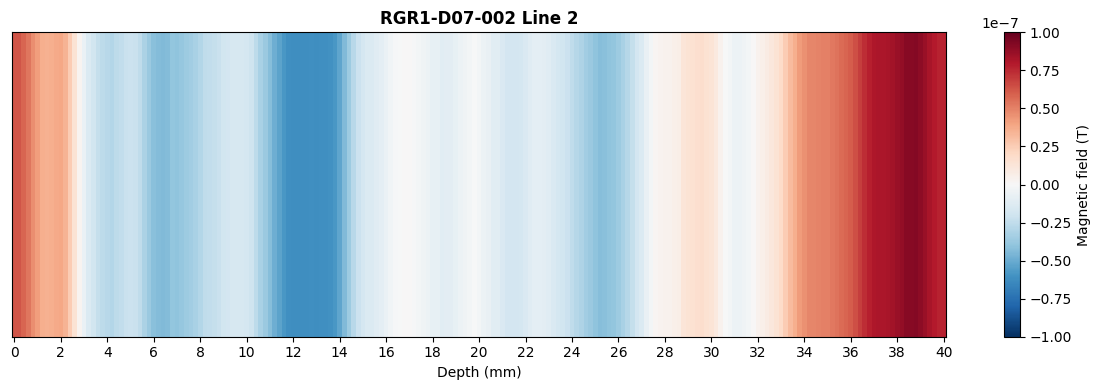

In [19]:
import matplotlib
matplotlib.rcParams.update(matplotlib.rcParamsDefault)
plt.rcParams['ytick.left'] = False
plt.rcParams['ytick.labelleft'] = False
fig = plt.figure(figsize=(12,4))
plt.pcolormesh(x,y,line1_array.T, cmap='RdBu_r', vmin=-1e-7,vmax=1e-7)
plt.xticks(np.linspace(0,np.max(depth),21))
#plt.xticklabels(xticklabels)
plt.title('{} Line 2'.format(file), fontweight='bold')
plt.xlabel('Depth (mm)')
plt.colorbar(label='Magnetic field (T)')
plt.tight_layout()
plt.savefig('{}-stripe-line2.pdf'.format(file), dpi=120)